<ipython-input-1-cb3372a5e08f>:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


From 20200101-0000
To 20200101-2300
From 20200101-0000
To 20200101-2300
Writing timeseries for station Blindern at 10.72, 59.9423
<xarray.DataArray 'integral_of_toa_net_downward_shortwave_flux_wrt_time' (time: 24, top_of_atmosphere: 1)>
array([[     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [ 25152.],
       [157888.],
       [239680.],
       [264704.],
       [218240.],
       [115840.],
       [  3712.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.]], dtype=float32)
Coordinates:
  * time               (time) datetime64[ns] 2020-01-01 ... 2020-01-01T23:00:00
  * top_of_atmosphere  (top_of_atmosphere) int16 0
    longitude          float64 10.73
    latitude           float64 59.93
Attributes:
    long_name:      Accumulated TOA net downward SW radiation
    standard_name:  int

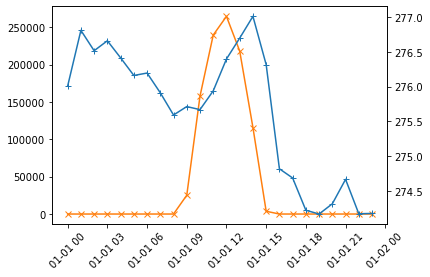

In [1]:
import NORA3_ERA5
import datetime
import matplotlib.pyplot as plt

params_rad = ["integral_of_toa_net_downward_shortwave_flux_wrt_time"]#, 
        #"integral_of_surface_net_downward_shortwave_flux_wrt_time",
        #"integral_of_surface_downwelling_shortwave_flux_in_air_wrt_time"]

params_p = ["snowfall_amount_acc", 
        "precipitation_amount_acc"]

params_other = ["air_temperature_2m",
        "relative_humidity_2m"]

params_clouds = ["cloud_area_fraction", # multiple timeseries in this one???
        "convective_cloud_area_fraction",
        "high_type_cloud_area_fraction",
        "medium_type_cloud_area_fraction",
        "low_type_cloud_area_fraction"]

# TODO:
# Check which file a certain datetime is read from. Is it the latest read file?? 
#
# 3 timers data: fc2020010100_00(3 og 6)_full_sfx.nc
# ASN_VEG
# TALB_ISBA
# ALBVIS_ISBA
#
# 3 timers data: fc2020010100_00(6 og 9).nc
# toa_net_downward_shortwave_flux
# surface_downwelling_shortwave_flux_in_air

# Locations to fetch data for:
# Blindern: 59.9423 E 10.72
# Bergen: N 60.3837 E 5.332
# Trømsø-Holt: N 69.6537 E 18.9368

lon = 10.72
lat = 59.9423

# Period to fetch data for: 2020

start_time_str = "2020-01-01T00:00:00"
end_time_str = "2020-01-01T23:00:00"

start_time = datetime.datetime.strptime(start_time_str, "%Y-%m-%dT%H:%M:%S")
end_time = datetime.datetime.strptime(end_time_str, "%Y-%m-%dT%H:%M:%S")

fig, ax1 = plt.subplots() 

tss = []
for param in params_rad:
    ts = NORA3_ERA5.get_nora3_timeseries(param, lon, lat, start_time, end_time)
    tss.append(ts)
    ax1.plot(ts.time, ts.values, color="tab:orange", marker="x")
plt.xticks(rotation=45)

ax2 = ax1.twinx()

ts = NORA3_ERA5.get_nora3_timeseries("air_temperature_2m", lon, lat, start_time, end_time)
ax2.plot(ts.time, ts.values, color="tab:blue", marker="+")
fig.show()
